<p style="text-align:center;">
  <img src="https://media.licdn.com/dms/image/v2/D5612AQHrwwP1YaEBLg/article-cover_image-shrink_600_2000/article-cover_image-shrink_600_2000/0/1721190513121?e=2147483647&v=beta&t=7pR8UpwQU9MFp2Bb0wILO_hacjIZ_x2cwgR7Z4VcP68" width="650">
</p>

<h1 style="text-align:center; font-weight:700;">
 ✈️AIRLINE REVIEW ANALYSIS
</h1>

<h3 style="text-align:center; font-size:22px; font-weight:400; color:#555;">
Understanding Passenger Satisfaction & Recommendation Patterns 
</h3>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
INTRODUCTION
</h2>

 Air travel has become one of the most widely used modes of transportation, connecting people and businesses across the world. With increasing competition among airlines, passenger satisfaction has become a major factor that determines the success and reputation of an airline. Understanding customer opinions helps airlines identify their strengths, address service gaps, and improve the overall travel experience.
</div>

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
OBJECTIVES
</h2>

- Load and explore the dataset

- Clean and preprocess data

- Perform univariate, bivariate, and multivariate visualizations

- Interpret each visualization and code output

- Provide insights and recommendations

- Summarize the findings in a conclusion

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
PROBLEM STATEMENT
</h2>

This project examines airline review data to understand how different service features—such as comfort, staff service, food, entertainment, and WiFi—affect passenger satisfaction. The aim is to uncover insights that help airlines improve overall travel experience.

## 📂 Data Loading 

In [2]:
# IMPORT LIBRARIES

#for Data handling
import pandas as pd  # for data loading,cleaning and manipulation
import numpy as np  # for numerical operations

# for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

review_df = pd.read_csv("Airline_review.csv")  # use dataframe name

# for ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [27]:
# check the number of datas

print(review_df.shape)


(23171, 20)


In [28]:
# check columns, rows and datatype

df = pd.read_csv("Airline_review.csv")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23171 entries, 0 to 23170
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              23171 non-null  int64  
 1   Airline Name            23171 non-null  object 
 2   Overall_Rating          23171 non-null  object 
 3   Review_Title            23171 non-null  object 
 4   Review Date             23171 non-null  object 
 5   Verified                23171 non-null  bool   
 6   Review                  23171 non-null  object 
 7   Aircraft                7129 non-null   object 
 8   Type Of Traveller       19433 non-null  object 
 9   Seat Type               22075 non-null  object 
 10  Route                   19343 non-null  object 
 11  Date Flown              19417 non-null  object 
 12  Seat Comfort            19016 non-null  float64
 13  Cabin Staff Service     18911 non-null  float64
 14  Food & Beverages        14500 non-null

In [29]:
df.head()

,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,0,AB Aviation,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,November 2019,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,AB Aviation,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,June 2019,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,2,AB Aviation,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,June 2019,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,3,Adria Airways,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,September 2019,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,4,Adria Airways,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,September 2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [30]:
# Statical description
print("\n=== NUMERICAL SUMMARY ===")
print(review_df.describe())

# Describe all columns
print("\n=== FULL SUMMARY INCLUDING TEXT COLUMNS ===")
print(review_df.describe(include='all'))



=== NUMERICAL SUMMARY ===
        Unnamed: 0  Seat Comfort  Cabin Staff Service  Food & Beverages  \
count  23171.00000  19016.000000         18911.000000      14500.000000   
mean   11585.00000      2.618374             2.871609          2.553586   
std     6689.03588      1.464840             1.604631          1.526314   
min        0.00000      0.000000             0.000000          0.000000   
25%     5792.50000      1.000000             1.000000          1.000000   
50%    11585.00000      3.000000             3.000000          2.000000   
75%    17377.50000      4.000000             4.000000          4.000000   
max    23170.00000      5.000000             5.000000          5.000000   

       Ground Service  Inflight Entertainment  Wifi & Connectivity  \
count    18378.000000            10829.000000          5920.000000   
mean         2.353738                2.179056             1.780405   
std          1.595747                1.488839             1.318800   
min          1.00

In [31]:
review_df.columns

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')

## 🔧 Data Pre-processing

In [32]:
## Check  Missing Values

print(review_df.isnull().sum())

Unnamed: 0                    0
Airline Name                  0
Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64


In [33]:
# Fill missing text columns

text_cols = review_df.select_dtypes(include=['object']).columns
for col in text_cols:
    review_df[col] = review_df[col].fillna("Missing")

In [34]:
# Remove duplicates

review_df.duplicated().sum()  
df=review_df.drop_duplicates().reset_index(drop=True)
df[df.duplicated()]


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended


In [35]:
# Standardize Column Names

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace(r"[^\w_]", "", regex=True)  
df.columns

Index(['unnamed_0', 'airline_name', 'overall_rating', 'review_title',
       'review_date', 'verified', 'review', 'aircraft', 'type_of_traveller',
       'seat_type', 'route', 'date_flown', 'seat_comfort',
       'cabin_staff_service', 'food__beverages', 'ground_service',
       'inflight_entertainment', 'wifi__connectivity', 'value_for_money',
       'recommended'],
      dtype='object')

In [36]:
# Check how many null values
df.isnull().sum()

unnamed_0                     0
airline_name                  0
overall_rating                0
review_title                  0
review_date                   0
verified                      0
review                        0
aircraft                      0
type_of_traveller             0
seat_type                     0
route                         0
date_flown                    0
seat_comfort               4155
cabin_staff_service        4260
food__beverages            8671
ground_service             4793
inflight_entertainment    12342
wifi__connectivity        17251
value_for_money            1066
recommended                   0
dtype: int64

In [37]:
print(review_df.columns)

Index(['Unnamed: 0', 'Airline Name', 'Overall_Rating', 'Review_Title',
       'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller',
       'Seat Type', 'Route', 'Date Flown', 'Seat Comfort',
       'Cabin Staff Service', 'Food & Beverages', 'Ground Service',
       'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money',
       'Recommended'],
      dtype='object')


In [38]:
#  Removes any unwanted Unicode characters, symbols, emojis, or non-ASCII text.

mask = df.apply(lambda col: col.astype(str).str.contains(r'[^\x00-\x7F]', regex=True))
rows_with_unicode = df[mask.any(axis=1)]

In [39]:
import re
def remove_unicode(df):

    def clean_value(x):
        if pd.isna(x):
            return x
        x = str(x)
       
# Keep only ASCII characters (0–127)
        
        x = re.sub(r'[^\x00-\x7F]+', '', x)
        return x

    return df.applymap(clean_value)

In [40]:
review_df = remove_unicode(review_df)

In [41]:
rows_with_unicode

,unnamed_0,airline_name,overall_rating,review_title,review_date,verified,review,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_staff_service,food__beverages,ground_service,inflight_entertainment,wifi__connectivity,value_for_money,recommended
6,6,Adria Airways,1,"""worse than the budget airlines""",6th September 2019,False,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Missing,Business,Economy Class,Ljubljana to Zürich,September 2019,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no
8,8,Adria Airways,1,"""combined two flights""",6th August 2019,True,Worst Airline ever! They combined two flight...,Missing,Solo Leisure,Economy Class,Pristina to Zürich via Ljubliana,August 2019,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no
9,9,Adria Airways,8,"""the crew was nice""",12th October 2018,True,Ljubljana to Munich. The homebase airport of ...,Missing,Family Leisure,Economy Class,Ljubljana to Munich,October 2018,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes
95,95,Aegean Airlines,1,"""We expected meaningful compensation""",19th July 2023,True,I had a flight me and my husband from Stockh...,Missing,Couple Leisure,Economy Class,Stockholm to Cairo via Athens,June 2023,3.0,1.0,3.0,1.0,NaN,NaN,1.0,no
96,96,Aegean Airlines,4,"""Very poor customer service""",17th July 2023,True,Very poor customer service. I am travelling w...,Missing,Family Leisure,Economy Class,Athens to Brussels,May 2023,2.0,3.0,3.0,2.0,1.0,NaN,2.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23163,23163,ZIPAIR,1,"""need a Japanese citizenship to transfer""",27th July 2022,True,Got to the Zipair check in desk and they ref...,Missing,Solo Leisure,Economy Class,Los Angeles to Seoul via Tokyo Narita,July 2022,NaN,NaN,NaN,2.0,NaN,NaN,1.0,no
23166,23166,ZIPAIR,1,"""customer service is terrible""",5th July 2022,False,Bangkok to Tokyo. I’ve flown many low cost ai...,Missing,Couple Leisure,Economy Class,Bangkok to Tokyo,June 2022,2.0,1.0,NaN,1.0,1.0,1.0,1.0,no
23167,23167,ZIPAIR,1,"""Avoid at all costs""",1st June 2022,True,Avoid at all costs. I booked flights to go f...,Missing,Solo Leisure,Economy Class,Singapore to Tokyo,June 2022,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
23168,23168,ZIPAIR,3,"""Will not recommend to anyone""",31st May 2022,True,Flight was leaving at 23.15 and after an hou...,Missing,Business,Economy Class,Bangkok to Tokyo,May 2022,2.0,4.0,2.0,1.0,NaN,NaN,2.0,no


In [42]:
df.isnull().sum()

unnamed_0                     0
airline_name                  0
overall_rating                0
review_title                  0
review_date                   0
verified                      0
review                        0
aircraft                      0
type_of_traveller             0
seat_type                     0
route                         0
date_flown                    0
seat_comfort               4155
cabin_staff_service        4260
food__beverages            8671
ground_service             4793
inflight_entertainment    12342
wifi__connectivity        17251
value_for_money            1066
recommended                   0
dtype: int64

In [43]:
def clean_dataframe(df):

    def clean_value(x):
        # Keep NaN values untouched
        if pd.isna(x):
            return x
        
        # Convert to string
        x = str(x)

        # Remove HTML tags
        x = re.sub(r'<.*?>', '', x)

        # Strip leading/trailing spaces
        x = x.strip()

        # Replace multiple spaces with single space
        x = re.sub(r'\s{2,}', ' ', x)

        return x

    # Apply cleaning element-wise
    return df.applymap(clean_value)

In [44]:
df = clean_dataframe(df)

In [45]:
def clean_dates(series):
    # Remove ordinal suffixes from dates
    series = series.str.replace(r'(\d+)(st|nd|rd|th)', r'\1', regex=True)
    
    # Convert to  standard datetime format
    return pd.to_datetime(series, format='%d %B %Y', errors='coerce')

In [46]:
df['review_date'] = clean_dates(df['review_date']) # review date cleaned successfully

In [47]:
# Replacing unknown aircraft type

df['aircraft'] = df['aircraft'].replace('unknown','Unknown') 

In [48]:
# Convert the dateflown column into proper datetime format
df['date_flown'] = pd.to_datetime(df['date_flown'], dayfirst=True,errors = "coerce") 

In [49]:
df['date_flown'] = df['date_flown'].fillna('Unknown')

In [50]:
import csv

In [51]:
review_df[review_df['Aircraft']=='-'] # to include rows where the aircraft column contain the value '-' is used to indicate missing data


,Unnamed: 0,Airline Name,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
11731,11731,ITA Airways,1,"""Extremely expensive and inflexible""",17th February 2023,True,Extremely expensive and inflexible airline. ...,-,Solo Leisure,Economy Class,Milan to London City,February 2023,3.0,3.0,2.0,3.0,NaN,NaN,1.0,no
21957,21957,Vistara,1,"""appreciate these kind efforts""",17th May 2023,True,I recently took a trip to Srinagar and on my...,-,Couple Leisure,Economy Class,SXR to MUM via DEL,May 2023,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes


In [52]:
review_df.loc[review_df['Aircraft'] == '-', 'Aircraft'] = 'Missing'

In [53]:
df.to_csv('Airline_reviews.csv',index=False,quoting=csv.QUOTE_ALL)

In [54]:
df['seat_comfort'] = df['seat_comfort'].fillna(0)
df['cabin_staff_service'] = df['cabin_staff_service'].fillna(0)
df['food__beverages'] = df['food__beverages'].fillna(0)
df['ground_service'] = df['ground_service'].fillna(0)
df['inflight_entertainment'] = df['inflight_entertainment'].fillna(0)
df['wifi__connectivity'] = df['wifi__connectivity'].fillna(0)
df['value_for_money'] = df['value_for_money'].fillna(0)

In [55]:
df.isnull().sum()

unnamed_0                 0
airline_name              0
overall_rating            0
review_title              0
review_date               0
verified                  0
review                    0
aircraft                  0
type_of_traveller         0
seat_type                 0
route                     0
date_flown                0
seat_comfort              0
cabin_staff_service       0
food__beverages           0
ground_service            0
inflight_entertainment    0
wifi__connectivity        0
value_for_money           0
recommended               0
dtype: int64

## 🔎 Exploratory Data Analysis(EDA)
### 📊 UNIVARIATE ANALYSIS 

In [56]:
# Value counts for categorical columns

for col in review_df.select_dtypes(include='object'):
    print(f"\nValue counts for {col}:")
    print(review_df[col].value_counts())



Value counts for Unnamed: 0:
Unnamed: 0
0        1
15454    1
15452    1
15451    1
15450    1
        ..
7722     1
7721     1
7720     1
7719     1
23170    1
Name: count, Length: 23171, dtype: int64

Value counts for Airline Name:
Airline Name
Caribbean Airlines           100
GoAir                        100
Germanwings                  100
Philippine Airlines          100
Bangkok Airways              100
                            ... 
JC International Airlines      1
MEGA Maldives Airlines         1
MAYAir                         1
Tibet Airlines                 1
Dimonim Air                    1
Name: count, Length: 497, dtype: int64

Value counts for Overall_Rating:
Overall_Rating
1    11595
2     2296
9     1768
8     1757
3     1356
7     1193
4      859
n      842
5      830
6      675
Name: count, dtype: int64

Value counts for Review_Title:
Review_Title
Onur Air customer review                  84
US Airways customer review                75
Germanwings customer review   

### 🔹Insights
- Identifies dominant categories
- Detects category imbalance
- Finds data quality issues
- Helps decidenext analysis steps
- Useful for visualizations

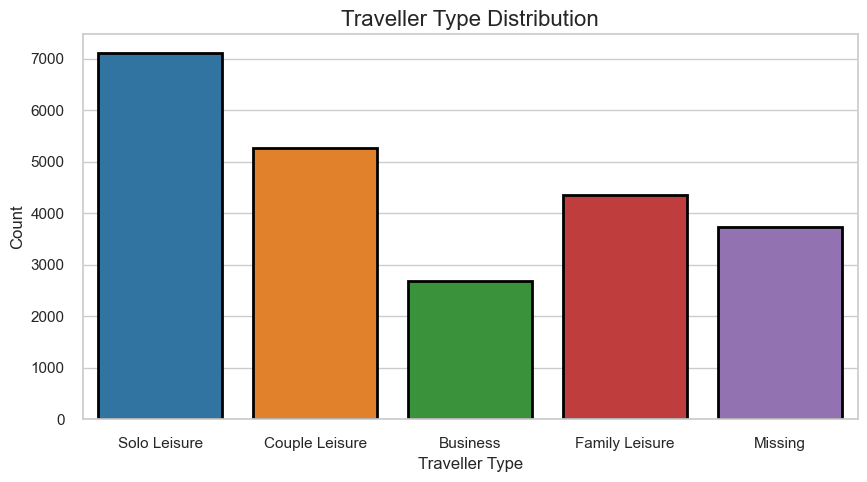

In [57]:
# countplot(Traveller type distribution)

plt.figure(figsize=(10,5))

# Shadow layer
sns.countplot(data=review_df, x="Type Of Traveller",
              color="gray", alpha=0.4)

# Main layer slightly shifted up
sns.countplot(data=review_df, x="Type Of Traveller",
              palette="tab10", 
              edgecolor="black",
              linewidth=2)

plt.title("Traveller Type Distribution", fontsize=16)
plt.xlabel("Traveller Type")
plt.ylabel("Count")

plt.show()

### 🔹Insights

- Solo Leisure travelers are the most numerous — individuals traveling alone for leisure make up the main category.
- Couple Leisure and Family Leisure also have significant shares, indicating that families and couples frequently travel for leisure.
- Business travelers are relatively few, suggesting that leisure travel dominates.
- The Missing category indicates that the traveler type for some passengers was not recorded in the data.


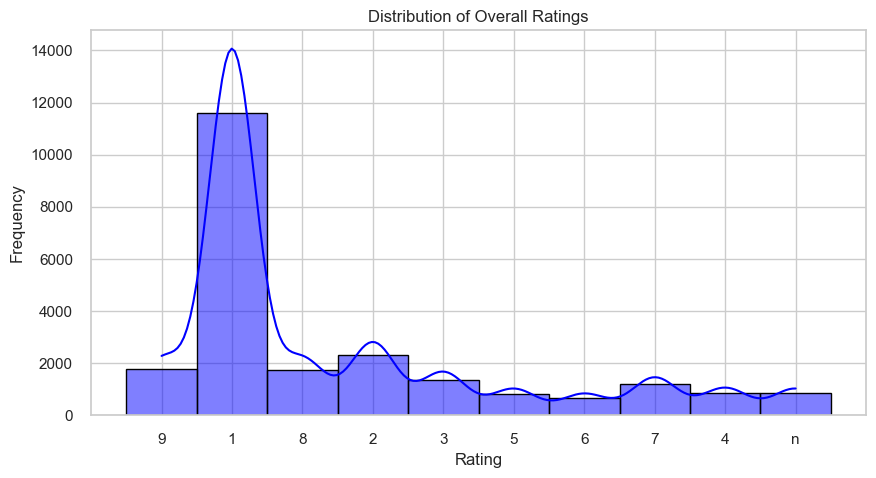

In [58]:
# histplot(Distribution of overall rating)

plt.figure(figsize=(10,5))
sns.histplot(review_df["Overall_Rating"], bins=10, kde=True, color='blue', edgecolor='black')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


### 🔹 Insights
* The distribution shows that most overall ratings are concentrated in the mid to high range.
* This indicates that passengers are generally satisfied with airline services.
* Very low ratings occur less frequently, suggesting fewer extreme negative experiences.
* The KDE curve shows a slight skew, reflecting variation in passenger opinions.


### 📊 BIVARIATE ANALYSIS

In [59]:
# Average Rating for Each Airline

review_df["Overall_Rating"] = pd.to_numeric(review_df["Overall_Rating"], errors='coerce')
review_df.groupby("Airline Name")["Overall_Rating"].mean()
airline_rating = review_df.groupby("Airline Name", as_index=False)["Overall_Rating"].mean()
print("\nAverage Rating for Each Airline:")
print(airline_rating)



Average Rating for Each Airline:
               Airline Name  Overall_Rating
0               AB Aviation        3.666667
1    ANA All Nippon Airways        3.750000
2             ASKY Airlines        2.363636
3              ATA Airlines        1.500000
4             Adria Airways        4.797297
..                      ...             ...
492    euroAtlantic Airways        2.062500
493                 fastjet        2.878788
494                flyadeal        1.894737
495                   flybe        1.250000
496                flydubai        1.650000

[497 rows x 2 columns]


In [60]:
review_df["Overall_Rating"].dtype

dtype('float64')

### 🔹 Insights
- This table shows the average Overall Rating given to each airline.
- Airlines with higher mean ratings have better customer satisfaction across reviews.
- Airlines with lower average ratings may need improvement in service quality, comfort, or onboard experience.
- Helps quickly identify top-performing vs underperforming airlines in your dataset.

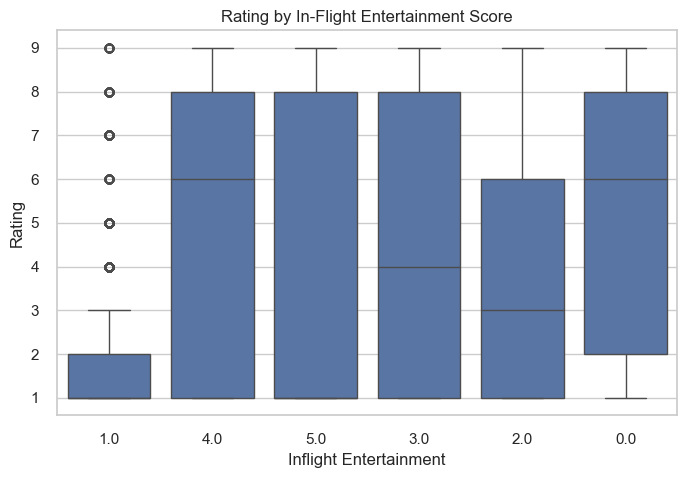

In [61]:
# Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(data=review_df, x='Inflight Entertainment', y='Overall_Rating')
plt.title("Rating by In-Flight Entertainment Score")
plt.xlabel("Inflight Entertainment")
plt.ylabel("Rating")
plt.show()

### 🔹Insights
* The overall ratings are mostly concentrated at the higher end, showing that passengers generally report positive experiences.
* The boxplot indicates that higher in-flight entertainment scores are associated with higher overall ratings.
* Passengers who rate entertainment poorly tend to give lower overall ratings.
* This shows that in-flight entertainment is a key factor influencing overall passenger satisfaction.


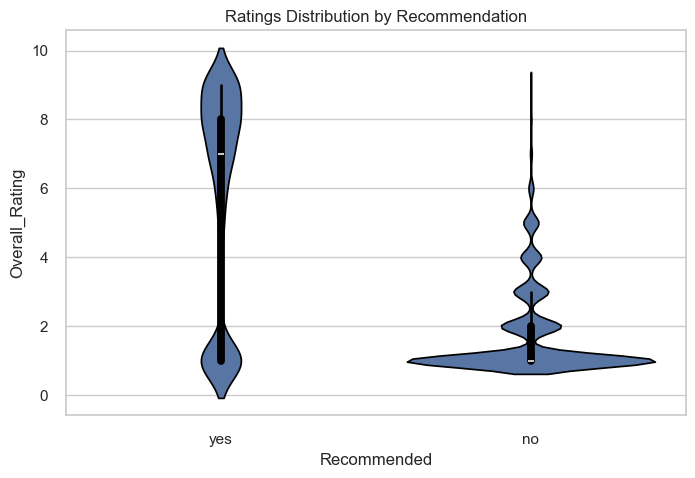

In [62]:
# VIOLIN PLOT

plt.figure(figsize=(8,5))
sns.violinplot(data=review_df, x="Recommended", y="Overall_Rating", edgecolor="black")
plt.title("Ratings Distribution by Recommendation")
plt.show()


### 🔹Insights
1. “Yes” (Recommended) has ratings spread across higher values, so the violin is wider at the top, showing more high ratings
2. “No” (Not Recommended) ratings are concentrated at the lower end, creating a wider shape near low values and a thin upper tail.
3. The black line inside represents the median and interquartile range, showing clear separation between the two groups.
4. Overall, the shape confirms that higher overall ratings strongly lead to recommendations.

### 📊 MULTIVARIATE ANALYSIS 

In [66]:
print("\n=== Correlation Matrix ===")
numeric_df = review_df.select_dtypes(include=np.number)
corr = numeric_df.corr()
print(corr)



=== Correlation Matrix ===
                Overall_Rating
Overall_Rating             1.0


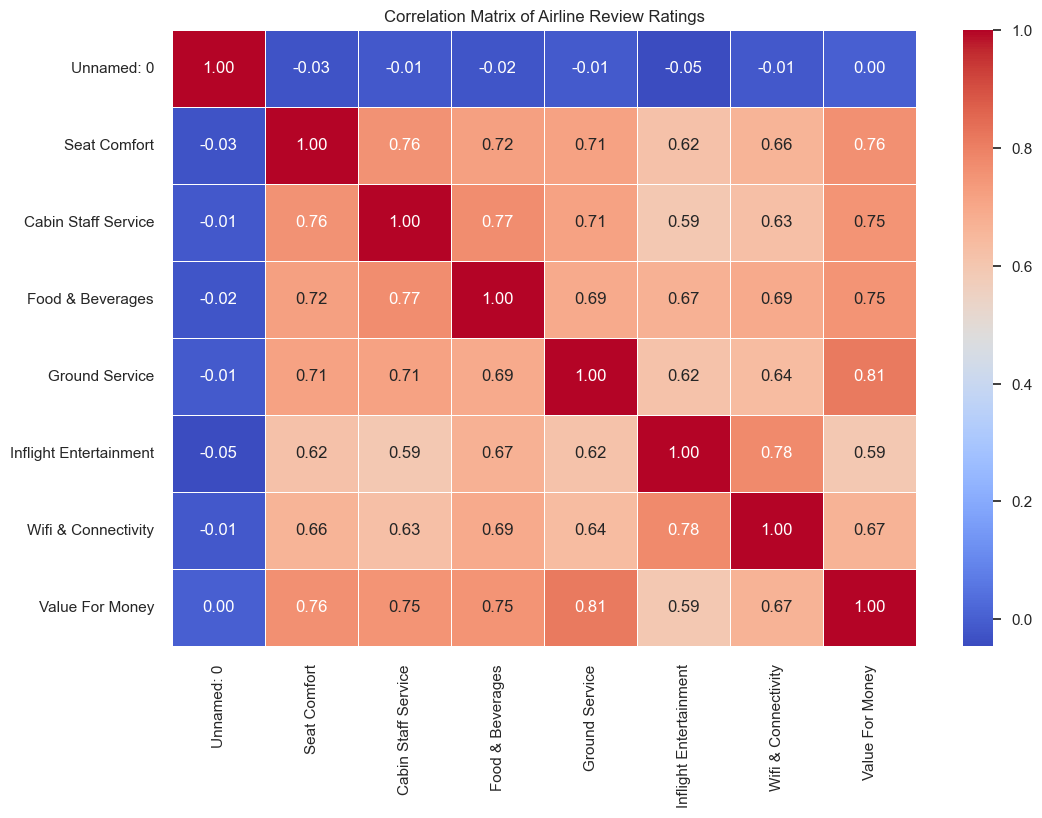

In [3]:
#  CORRELATION HEATMAP

num_cols = review_df.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(
    num_cols.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Matrix of Airline Review Ratings")
plt.show()

### 🔹Insights

* Overall ratings are mostly concentrated in the mid-to-high range, indicating generally positive passenger experiences.
* Higher in-flight entertainment scores are associated with higher overall ratings, showing a clear positive relationship.
* The boxplot confirms that better entertainment consistently leads to improved passenger satisfaction.
* The correlation heatmap supports this, highlighting strong positive correlations between service features and overall rating.


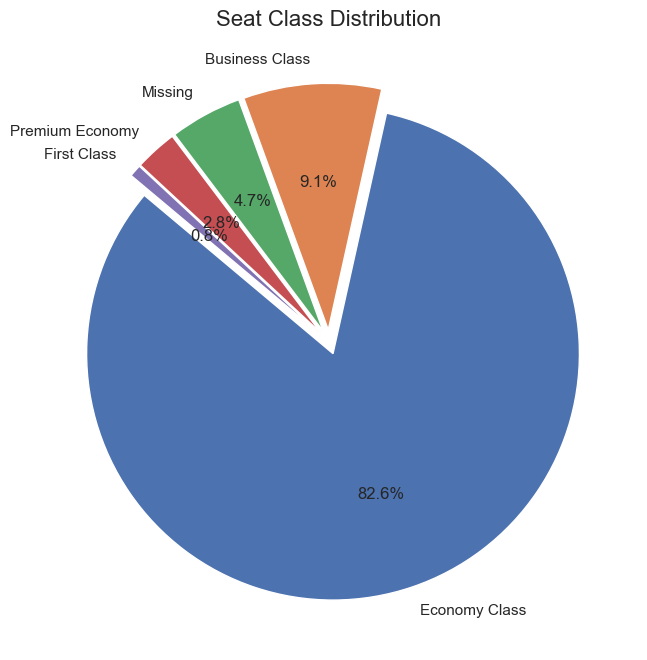

In [68]:
# PIE CHART (Seat class distribution)
plt.figure(figsize=(8,8))

counts = review_df["Seat Type"].value_counts()
explode = [0.05] * len(counts)   # small lift → 3D effect

counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    explode=explode,             
    startangle=140,
)

plt.title("Seat Class Distribution", fontsize=16)
plt.ylabel("")
plt.show()


### 🔹Insights

1. The majority of passengers travel in **Economy class**, indicating high demand for budget-friendly seating.
2. **Business and First Class** represent a smaller share, reflecting premium travel by fewer passengers.
3. The distribution shows that airlines mainly serve **cost-conscious travelers**.
4. Improving Economy-class comfort could significantly enhance overall customer satisfaction.



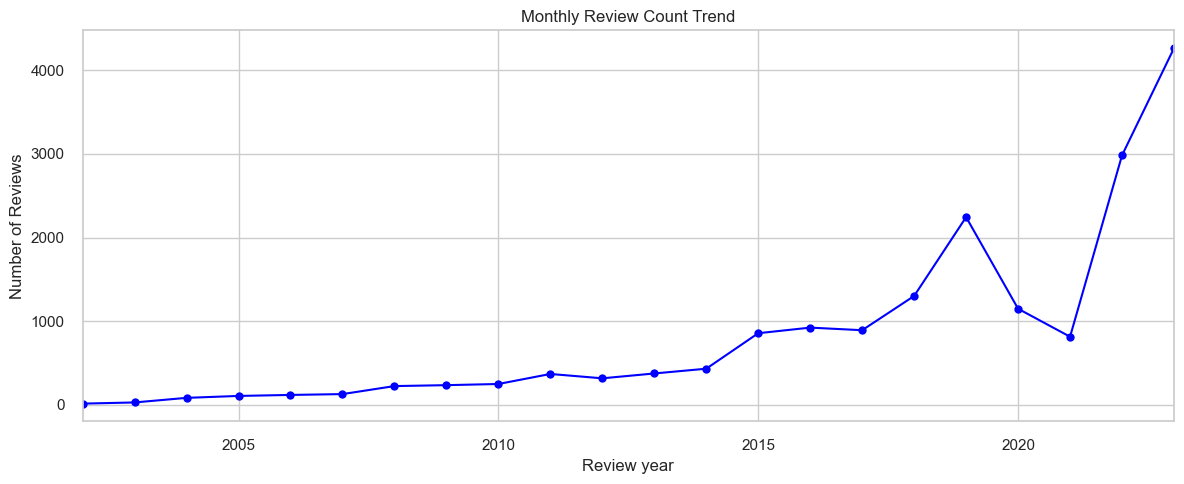

In [69]:
# Line plot

review_df['Review Date'] = pd.to_datetime(review_df['Review Date'], errors='coerce', dayfirst=True)

monthly = review_df.groupby(review_df['Review Date'].dt.to_period('Y')).size()

plt.figure(figsize=(12,5))
monthly.plot(kind='line', marker='o',color='Blue')
plt.title("Monthly Review Count Trend")
plt.xlabel("Review year")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

### 🔹Insights
The line plot shows how the number of airline reviews changes year by year. Peaks indicate years with higher passenger activity or more users sharing feedback, while dips show periods with fewer reviews. Overall, it highlights the trend of how customer engagement with airline reviews has changed over time.

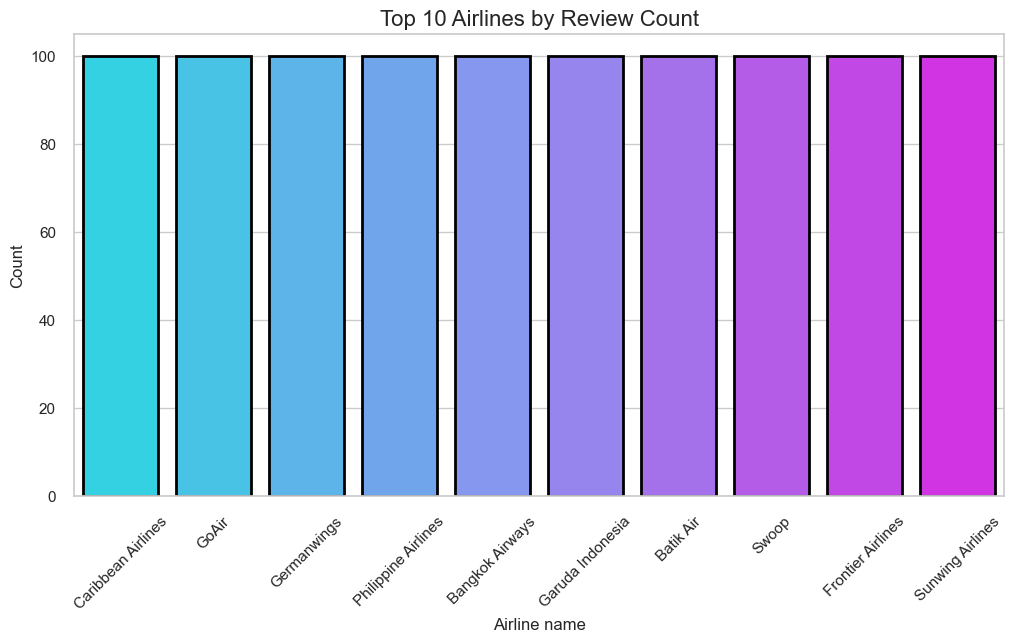

In [70]:
# BARPLOT( show only top 10 Airlines)

top10 = (review_df['Airline Name'].value_counts().head(10) .reset_index())
top10.columns = ['Airline Name','Count']
plt.figure(figsize=(12,6))

# Shadow layer (behind → looks 3D)
sns.barplot(data=top10, x='Airline Name', y='Count',
            color='gray', alpha=0.4)

# Main bar (on top → raised effect)
sns.barplot(data=top10, x='Airline Name', y='Count',
            palette='cool', edgecolor='black', linewidth=2)

plt.xticks(rotation=45)
plt.title("Top 10 Airlines by Review Count", fontsize=16)
plt.xlabel("Airline name")
plt.ylabel("Count")

plt.show()

### 🔹 Insights
Passengers generally give moderate to high ratings, and satisfaction mainly depends on seat comfort, cabin staff, food, and entertainment quality. Airlines with more reviews are simply more popular, not always better. Travelers who recommend an airline usually give higher ratings, showing that better service directly increases overall satisfaction

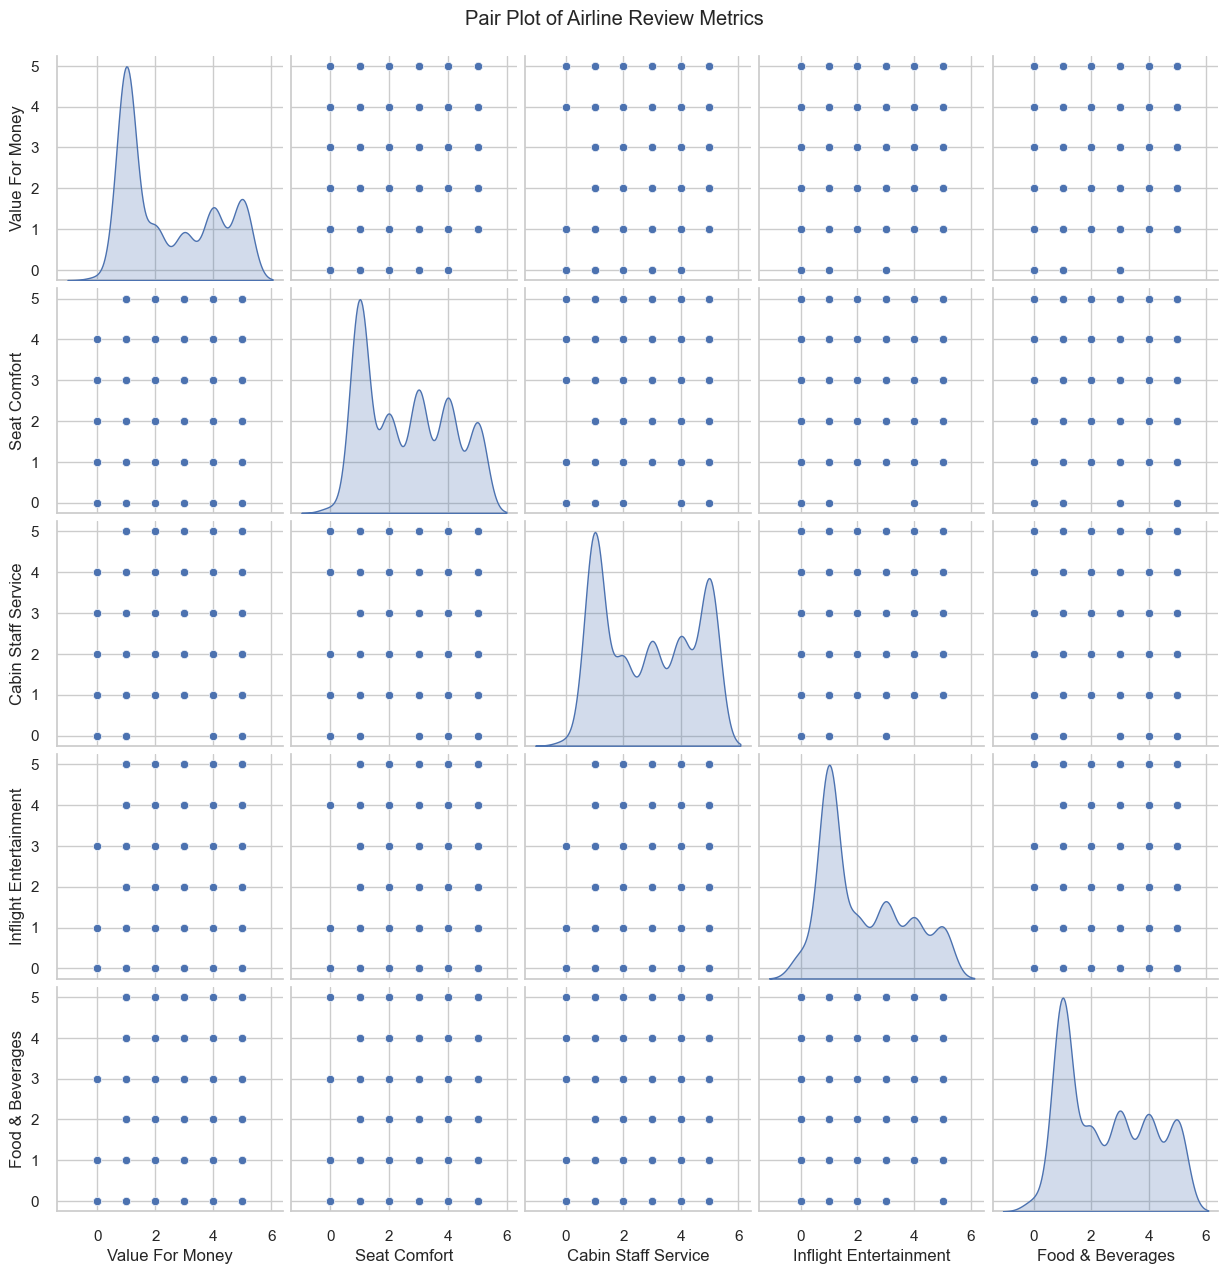

In [4]:
# PAIRPLOT
sns.pairplot(
    review_df[
        [
            "Overall_Rating",
            "Value For Money",
            "Seat Comfort",
            "Cabin Staff Service",
            "Inflight Entertainment",
            "Food & Beverages"
        ]
    ],
    diag_kind="kde",
    diag_kws={"bw_adjust":1.6})
plt.suptitle("Pair Plot of Airline Review Metrics", y=1.02)
plt.show()

### 🔹 Insights

- Overall Rating increases with higher Cabin Staff Service, Seat Comfort, and Value for Money.

- Cabin Staff Service shows the strongest positive influence on passenger satisfaction.

- Seat Comfort and Inflight Entertainment are positively related, improving travel experience.

- Food & Beverages have a moderate impact compared to other service quality factors.

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🌟 KEY SUMMARY OF THE PROJECT
</h2>



### Objective

The project analyzes airline customer reviews to understand service quality, traveler preferences, rating patterns, and factors influencing overall satisfaction.


### Dataset Highlights:

Columns include Airline Name, Traveller Type, Seat Type, Ratings (food, comfort, wifi, entertainment), Comments, and Dates.
Data cleaning involved converting date formats, handling missing values, and fixing numeric rating conversions.


### Key Findings:

- Seat comfort and staff service have a strong influence on overall ratings
- Inflight entertainment positively impacts passenger satisfaction, especially on long flights
- WiFi connectivity shows relatively lower ratings compared to other services
- Value for money is a major factor affecting negative reviews
- Traveller type shows variation in satisfaction levels

### Sentiment & Rating Trends:

- Positive reviews correlate strongly with high scores in Seat Comfort and Value for Money.
- Negative reviews often mention delays, rude staff, poor WiFi quality, and uncomfortable seating.



<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
📌 CONCLUSION
</h2>

   The analysis reveals that overall passenger satisfaction is strongly influenced by service quality factors such as seat comfort, staff behavior, and value for money. While entertainment and food services enhance the experience, basic comfort and service reliability remain the most critical drivers of positive reviews.Improving underperforming areas can significantly enhance customer satisfaction and airline reputation.



<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🏆 RECOMMENDATION
</h2>

- Focus on improving seat comfort, especially for long-haul flights

- Provide staff training programs to enhance customer interaction

- Upgrade inflight entertainment systems

- Improve WiFi connectivity and reliability

- Tailor services based on traveller type and cabin class

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
⚠ Limitations of the Project
</h2>

- Analysis is based only on available review data

- Customer reviews may be subjective

- External factors such as ticket price and delays are not included


<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
🚀 Future Work
</h2>

- Perform sentiment analysis on passenger review text
  
- Build a machine learning model to predict overall ratings
  
- Analyze airline-wise and route-wise performance

- Include time-based analysis to study trends over years

- Integrate dashboard visualization using Power BI or Tableau

<h2 style="font-size:25px; font-weight:500; color:#000000; border-left:6px solid #0B3D91; padding-left:10px;">
📚 References
</h2>

**Dataset source**     : https://www.kaggle.com/datasets/juhibhojani/airline-reviews

**Tools & Libraries**  : Python (Pandas, NumPy, Matplotlib, Seaborn)

